#Importing Libraries



In [ ]:
pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
data=pd.read_excel('/content/sorted.xlsx')
data

,tweet_id,tweet_created,tweet_extracted,text,lang,user_id,user_name,user_username,user_location,user_description,user_created,user_followers_count,user_following_count,user_tweet_count,user_verified,source,retweet_count,like_count,reply_count,impression_count
0,1640000000000000000,2023-04-03 03:59:28+00:00,0.004774,RT @DarrellLerner: ChatGPT Plugins are the fas...,en,2383245894,pk,pradeep42329225,India,ðŸ’ðŸ’à¥¤à¥¤à¤œà¤¯ à¤¶à¥à¤°à¥€ à¤®à¤¹à¤¾à¤•...,2014-03-11 06:04:10+00:00,269.0,4141.0,3816.0,0.0,NaN,628.0,0.0,0.0,0.0
1,1640000000000000000,2023-04-03 15:59:59+00:00,0.004916,Get an intelligent chatbot for your website in...,en,1633040000000000000,AR Leyva,ArrheniusLey,United Kingdom,Passionate about AI and its potential to trans...,2023-03-07 09:43:36+00:00,264.0,24.0,198.0,0.0,NaN,0.0,0.0,0.0,58.0
2,1640000000000000000,2023-04-03 01:59:25+00:00,0.004752,"ðŸ”¥Hey Guys, #ZenithSwap has launched at just...",en,1311400000000000000,Human Being ðŸ‡¨ðŸ‡³ðŸ‡¸ðŸ‡¬ðŸ‡»ðŸ‡³,KiarostamiBeing,"Chicago, IL",Freedom is the Recognition of Necessity â€¢ Ma...,2020-09-30 20:32:00+00:00,447.0,419.0,12949.0,0.0,NaN,0.0,0.0,0.0,0.0
3,1640000000000000000,2023-04-03 11:59:28+00:00,0.004866,RT @sinsonetwork: Now! Join #SINSO DataLand^Ch...,en,462142717,MokoHaram,holymoko,Zambia mufulira,Public fakerðŸ‚,2012-01-12 16:25:12+00:00,2286.0,982.0,20438.0,0.0,NaN,270.0,0.0,0.0,0.0
4,1640000000000000000,2023-04-03 12:59:26+00:00,0.004877,The plagiarism detector will introduce its #AI...,en,896094000000000000,Dr. Susan D'Agostino,susan_dagostino,"New Hampshire, USA",Tech reporter @insidehighered. Mathematician. ...,2017-08-11 19:41:50+00:00,4444.0,1924.0,3320.0,1.0,NaN,7.0,22.0,1.0,5769.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9035,1648820000000000000,2023-04-19 22:59:50+00:00,0.031465,RT @brain_slum: âš¡ï¸Brainslum 3333 GIFs Laun...,en,1626820000000000000,Atwood Daniell,AtwoodDaniell,NaN,NaN,2023-02-18 05:52:43+00:00,0.0,745.0,574.0,0.0,NaN,414.0,0.0,0.0,0.0
9036,1648570000000000000,2023-04-19 05:59:22+00:00,0.031226,RT @SamanthaPostman: Topics you must master ou...,en,271304698,CarAmba,folledingasse,NaN,Les vÃ©ritÃ©s qu'on aime le moins Ã apprendre...,2011-03-24 07:26:56+00:00,84.0,1039.0,2117.0,0.0,NaN,163.0,0.0,0.0,0.0
9037,1648720000000000000,2023-04-19 15:59:58+00:00,0.031362,RT @openbusinesshq: Watch this amazing video o...,en,134949799,Hilton Supra,HiltonSupra,London and Lisbon,Vice Chairman @ztudium @openbusinesshq @fashio...,2010-04-19 22:58:02+00:00,11717.0,3139.0,4964.0,0.0,NaN,15.0,0.0,0.0,0.0
9038,1648820000000000000,2023-04-19 22:59:40+00:00,0.031465,RT @Visiitapp: ðŸŽ SIIT Token Giveaway\nðŸ¥³ ...,en,1254491035,Matthew wisdom,Wisdom619,NaN,NaN,2013-03-09 14:17:02+00:00,49.0,326.0,276.0,0.0,NaN,13734.0,0.0,0.0,0.0


# Exploratory Data Analysis

In [ ]:
data.shape

(9040, 20)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9040 entries, 0 to 9039
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   tweet_id              9040 non-null   int64  
 1   tweet_created         9040 non-null   object 
 2   tweet_extracted       9040 non-null   float64
 3   text                  9040 non-null   object 
 4   lang                  9040 non-null   object 
 5   user_id               9040 non-null   int64  
 6   user_name             9039 non-null   object 
 7   user_username         9040 non-null   object 
 8   user_location         5442 non-null   object 
 9   user_description      7535 non-null   object 
 10  user_created          9037 non-null   object 
 11  user_followers_count  9037 non-null   float64
 12  user_following_count  9037 non-null   float64
 13  user_tweet_count      9037 non-null   float64
 14  user_verified         9037 non-null   float64
 15  source               

In [ ]:
data.describe()

,tweet_id,tweet_extracted,user_id,user_followers_count,user_following_count,user_tweet_count,user_verified,source,retweet_count,like_count,reply_count,impression_count
count,9.040000e+03,9040.000000,9.040000e+03,9.037000e+03,9037.000000,9.037000e+03,9037.000000,0.0,9037.000000,9037.000000,9037.000000,9037.000000
mean,1.644658e+18,0.018328,7.046859e+17,1.092807e+04,1579.006086,4.505681e+04,0.073586,NaN,870.632400,2.984287,0.489764,564.769503
std,4.439283e+15,0.012127,6.859376e+17,3.156265e+05,9214.553480,1.683934e+05,0.261111,NaN,2096.247441,71.444834,21.297972,15822.898749
min,1.640000e+18,0.000012,1.054500e+04,0.000000e+00,0.000000,1.000000e+00,0.000000,NaN,0.000000,0.000000,0.000000,0.000000
25%,1.640000e+18,0.005536,4.331203e+08,4.400000e+01,150.000000,7.300000e+02,0.000000,NaN,0.000000,0.000000,0.000000,0.000000
50%,1.646890e+18,0.017825,8.153340e+17,2.200000e+02,453.000000,4.796000e+03,0.000000,NaN,16.000000,0.000000,0.000000,0.000000
75%,1.648750e+18,0.027691,1.416560e+18,1.020000e+03,1316.000000,2.601400e+04,0.000000,NaN,720.000000,0.000000,0.000000,14.000000
max,1.650000e+18,0.041663,1.648610e+18,2.720585e+07,414703.000000,3.134697e+06,1.000000,NaN,25944.000000,4795.000000,2009.000000,887247.000000


In [ ]:
data.dtypes

tweet_id                  int64
tweet_created            object
tweet_extracted         float64
text                     object
lang                     object
user_id                   int64
user_name                object
user_username            object
user_location            object
user_description         object
user_created             object
user_followers_count    float64
user_following_count    float64
user_tweet_count        float64
user_verified           float64
source                  float64
retweet_count           float64
like_count              float64
reply_count             float64
impression_count        float64
dtype: object

In [ ]:
#Checking null values

data.isna().sum()

tweet_id                   0
tweet_created              0
tweet_extracted            0
text                       0
lang                       0
user_id                    0
user_name                  1
user_username              0
user_location           3598
user_description        1505
user_created               3
user_followers_count       3
user_following_count       3
user_tweet_count           3
user_verified              3
source                  9040
retweet_count              3
like_count                 3
reply_count                3
impression_count           3
dtype: int64

In [ ]:
#Checking unique values in columns

for column in data.columns:
   print(f"Unique values in {column}: {data[column].nunique()}")

Unique values in tweet_id: 150
Unique values in tweet_created: 6713
Unique values in tweet_extracted: 477
Unique values in text: 5354
Unique values in lang: 1
Unique values in user_id: 7755
Unique values in user_name: 7826
Unique values in user_username: 7916
Unique values in user_location: 3173
Unique values in user_description: 6578
Unique values in user_created: 7909
Unique values in user_followers_count: 2688
Unique values in user_following_count: 2749
Unique values in user_tweet_count: 6336
Unique values in user_verified: 2
Unique values in source: 0
Unique values in retweet_count: 900
Unique values in like_count: 86
Unique values in reply_count: 29
Unique values in impression_count: 708


In [ ]:
#Displaying Categorical columns

cat_data=data.select_dtypes(include=['object','bool'])
cat_data

,tweet_created,text,lang,user_name,user_username,user_location,user_description,user_created
0,2023-04-03 03:59:28+00:00,RT @DarrellLerner: ChatGPT Plugins are the fas...,en,pk,pradeep42329225,India,ðŸ’ðŸ’à¥¤à¥¤à¤œà¤¯ à¤¶à¥à¤°à¥€ à¤®à¤¹à¤¾à¤•...,2014-03-11 06:04:10+00:00
1,2023-04-03 15:59:59+00:00,Get an intelligent chatbot for your website in...,en,AR Leyva,ArrheniusLey,United Kingdom,Passionate about AI and its potential to trans...,2023-03-07 09:43:36+00:00
2,2023-04-03 01:59:25+00:00,"ðŸ”¥Hey Guys, #ZenithSwap has launched at just...",en,Human Being ðŸ‡¨ðŸ‡³ðŸ‡¸ðŸ‡¬ðŸ‡»ðŸ‡³,KiarostamiBeing,"Chicago, IL",Freedom is the Recognition of Necessity â€¢ Ma...,2020-09-30 20:32:00+00:00
3,2023-04-03 11:59:28+00:00,RT @sinsonetwork: Now! Join #SINSO DataLand^Ch...,en,MokoHaram,holymoko,Zambia mufulira,Public fakerðŸ‚,2012-01-12 16:25:12+00:00
4,2023-04-03 12:59:26+00:00,The plagiarism detector will introduce its #AI...,en,Dr. Susan D'Agostino,susan_dagostino,"New Hampshire, USA",Tech reporter @insidehighered. Mathematician. ...,2017-08-11 19:41:50+00:00
...,...,...,...,...,...,...,...,...
9035,2023-04-19 22:59:50+00:00,RT @brain_slum: âš¡ï¸Brainslum 3333 GIFs Laun...,en,Atwood Daniell,AtwoodDaniell,NaN,NaN,2023-02-18 05:52:43+00:00
9036,2023-04-19 05:59:22+00:00,RT @SamanthaPostman: Topics you must master ou...,en,CarAmba,folledingasse,NaN,Les vÃ©ritÃ©s qu'on aime le moins Ã apprendre...,2011-03-24 07:26:56+00:00
9037,2023-04-19 15:59:58+00:00,RT @openbusinesshq: Watch this amazing video o...,en,Hilton Supra,HiltonSupra,London and Lisbon,Vice Chairman @ztudium @openbusinesshq @fashio...,2010-04-19 22:58:02+00:00
9038,2023-04-19 22:59:40+00:00,RT @Visiitapp: ðŸŽ SIIT Token Giveaway\nðŸ¥³ ...,en,Matthew wisdom,Wisdom619,NaN,NaN,2013-03-09 14:17:02+00:00


In [ ]:
#Dropping unnecessary columns

data=data.drop(['user_name'],axis=1)
data=data.drop(['user_username'],axis=1)
data=data.drop(['user_location'],axis=1)

In [ ]:
#Displaying numerical columns

num_data=data.select_dtypes(include=['float','int64'])
num_data

,tweet_id,tweet_extracted,user_id,user_followers_count,user_following_count,user_tweet_count,user_verified,source,retweet_count,like_count,reply_count,impression_count
0,1640000000000000000,0.004774,2383245894,269.0,4141.0,3816.0,0.0,NaN,628.0,0.0,0.0,0.0
1,1640000000000000000,0.004916,1633040000000000000,264.0,24.0,198.0,0.0,NaN,0.0,0.0,0.0,58.0
2,1640000000000000000,0.004752,1311400000000000000,447.0,419.0,12949.0,0.0,NaN,0.0,0.0,0.0,0.0
3,1640000000000000000,0.004866,462142717,2286.0,982.0,20438.0,0.0,NaN,270.0,0.0,0.0,0.0
4,1640000000000000000,0.004877,896094000000000000,4444.0,1924.0,3320.0,1.0,NaN,7.0,22.0,1.0,5769.0
...,...,...,...,...,...,...,...,...,...,...,...,...
9035,1648820000000000000,0.031465,1626820000000000000,0.0,745.0,574.0,0.0,NaN,414.0,0.0,0.0,0.0
9036,1648570000000000000,0.031226,271304698,84.0,1039.0,2117.0,0.0,NaN,163.0,0.0,0.0,0.0
9037,1648720000000000000,0.031362,134949799,11717.0,3139.0,4964.0,0.0,NaN,15.0,0.0,0.0,0.0
9038,1648820000000000000,0.031465,1254491035,49.0,326.0,276.0,0.0,NaN,13734.0,0.0,0.0,0.0


In [ ]:
#Dropping unnecessary columns

data=data.drop(['source'],axis=1)

In [ ]:
pd.set_option('display.max_columns', None)
data

,tweet_id,tweet_created,tweet_extracted,text,lang,user_id,user_description,user_created,user_followers_count,user_following_count,user_tweet_count,user_verified,retweet_count,like_count,reply_count,impression_count
0,1640000000000000000,2023-04-03 03:59:28+00:00,0.004774,RT @DarrellLerner: ChatGPT Plugins are the fas...,en,2383245894,ðŸ’ðŸ’à¥¤à¥¤à¤œà¤¯ à¤¶à¥à¤°à¥€ à¤®à¤¹à¤¾à¤•...,2014-03-11 06:04:10+00:00,269.0,4141.0,3816.0,0.0,628.0,0.0,0.0,0.0
1,1640000000000000000,2023-04-03 15:59:59+00:00,0.004916,Get an intelligent chatbot for your website in...,en,1633040000000000000,Passionate about AI and its potential to trans...,2023-03-07 09:43:36+00:00,264.0,24.0,198.0,0.0,0.0,0.0,0.0,58.0
2,1640000000000000000,2023-04-03 01:59:25+00:00,0.004752,"ðŸ”¥Hey Guys, #ZenithSwap has launched at just...",en,1311400000000000000,Freedom is the Recognition of Necessity â€¢ Ma...,2020-09-30 20:32:00+00:00,447.0,419.0,12949.0,0.0,0.0,0.0,0.0,0.0
3,1640000000000000000,2023-04-03 11:59:28+00:00,0.004866,RT @sinsonetwork: Now! Join #SINSO DataLand^Ch...,en,462142717,Public fakerðŸ‚,2012-01-12 16:25:12+00:00,2286.0,982.0,20438.0,0.0,270.0,0.0,0.0,0.0
4,1640000000000000000,2023-04-03 12:59:26+00:00,0.004877,The plagiarism detector will introduce its #AI...,en,896094000000000000,Tech reporter @insidehighered. Mathematician. ...,2017-08-11 19:41:50+00:00,4444.0,1924.0,3320.0,1.0,7.0,22.0,1.0,5769.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9035,1648820000000000000,2023-04-19 22:59:50+00:00,0.031465,RT @brain_slum: âš¡ï¸Brainslum 3333 GIFs Laun...,en,1626820000000000000,NaN,2023-02-18 05:52:43+00:00,0.0,745.0,574.0,0.0,414.0,0.0,0.0,0.0
9036,1648570000000000000,2023-04-19 05:59:22+00:00,0.031226,RT @SamanthaPostman: Topics you must master ou...,en,271304698,Les vÃ©ritÃ©s qu'on aime le moins Ã apprendre...,2011-03-24 07:26:56+00:00,84.0,1039.0,2117.0,0.0,163.0,0.0,0.0,0.0
9037,1648720000000000000,2023-04-19 15:59:58+00:00,0.031362,RT @openbusinesshq: Watch this amazing video o...,en,134949799,Vice Chairman @ztudium @openbusinesshq @fashio...,2010-04-19 22:58:02+00:00,11717.0,3139.0,4964.0,0.0,15.0,0.0,0.0,0.0
9038,1648820000000000000,2023-04-19 22:59:40+00:00,0.031465,RT @Visiitapp: ðŸŽ SIIT Token Giveaway\nðŸ¥³ ...,en,1254491035,NaN,2013-03-09 14:17:02+00:00,49.0,326.0,276.0,0.0,13734.0,0.0,0.0,0.0


#2.3 Generating New Time Variables

In [ ]:
# Generating new time variables
data['tweet_created'] = pd.to_datetime(data['tweet_created'])
data['OnlyDate'] = data['tweet_created'].dt.date
data['OnlyDate'] = pd.to_datetime(data['OnlyDate'])
data['OnlyHour'] = data['tweet_created'].dt.hour
data['OnlyMin'] = data['tweet_created'].dt.minute

In [ ]:
data.head()

,tweet_id,tweet_created,tweet_extracted,text,lang,user_id,user_description,user_created,user_followers_count,user_following_count,user_tweet_count,user_verified,retweet_count,like_count,reply_count,impression_count,OnlyDate,OnlyHour,OnlyMin
0,1640000000000000000,2023-04-03 03:59:28+00:00,0.004774,RT @DarrellLerner: ChatGPT Plugins are the fas...,en,2383245894,ðŸ’ðŸ’à¥¤à¥¤à¤œà¤¯ à¤¶à¥à¤°à¥€ à¤®à¤¹à¤¾à¤•...,2014-03-11 06:04:10+00:00,269.0,4141.0,3816.0,0.0,628.0,0.0,0.0,0.0,2023-04-03,3,59
1,1640000000000000000,2023-04-03 15:59:59+00:00,0.004916,Get an intelligent chatbot for your website in...,en,1633040000000000000,Passionate about AI and its potential to trans...,2023-03-07 09:43:36+00:00,264.0,24.0,198.0,0.0,0.0,0.0,0.0,58.0,2023-04-03,15,59
2,1640000000000000000,2023-04-03 01:59:25+00:00,0.004752,"ðŸ”¥Hey Guys, #ZenithSwap has launched at just...",en,1311400000000000000,Freedom is the Recognition of Necessity â€¢ Ma...,2020-09-30 20:32:00+00:00,447.0,419.0,12949.0,0.0,0.0,0.0,0.0,0.0,2023-04-03,1,59
3,1640000000000000000,2023-04-03 11:59:28+00:00,0.004866,RT @sinsonetwork: Now! Join #SINSO DataLand^Ch...,en,462142717,Public fakerðŸ‚,2012-01-12 16:25:12+00:00,2286.0,982.0,20438.0,0.0,270.0,0.0,0.0,0.0,2023-04-03,11,59
4,1640000000000000000,2023-04-03 12:59:26+00:00,0.004877,The plagiarism detector will introduce its #AI...,en,896094000000000000,Tech reporter @insidehighered. Mathematician. ...,2017-08-11 19:41:50+00:00,4444.0,1924.0,3320.0,1.0,7.0,22.0,1.0,5769.0,2023-04-03,12,59


#2.4 First Exploratory Data Analysis Works

In [ ]:
def plot_time_variable(col, ylim_lower = 100, ylim_upper = 3000):
    """
    Given a pandas dataframe and the name of a time column, this function will plot a line graph of time counts
    using the specified column.
    
    Parameters:
    -----------
    col : str
        The name of a column in the pandas dataframe.
    """
    
    if data[col].dtype == "int64":
        time_variable_counts = data[col].value_counts().sort_index()
        
    else:
        # calculate the count of dates using resample
        time_variable_counts = data[col].value_counts().resample('D').sum()

    # set the size of the figure
    plt.figure(figsize=(12, 8))

    # plot the counts using a line graph
    time_variable_counts.plot(kind='line', marker='o', markersize=8)

    # set the y-axis limits to a specific range
    plt.ylim(ylim_lower, ylim_upper)

    # add graph labels and titles
    plt.title(f"{col} Counts", fontsize=16)
    plt.xlabel(f"{col}", fontsize=14)
    plt.ylabel("Count", fontsize=14)
    plt.xticks(rotation=45, ha='right') # rotate x-axis labels for readability
    plt.grid(axis='y', linestyle='--')

    # display the graph
    plt.show()

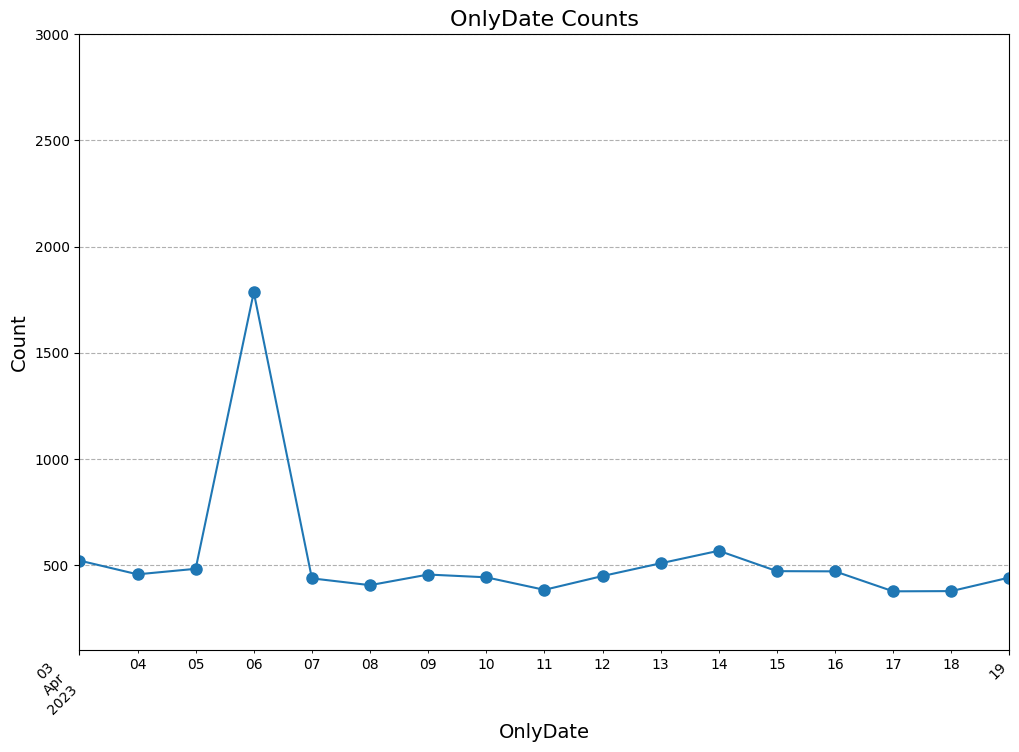

In [ ]:
plot_time_variable('OnlyDate')

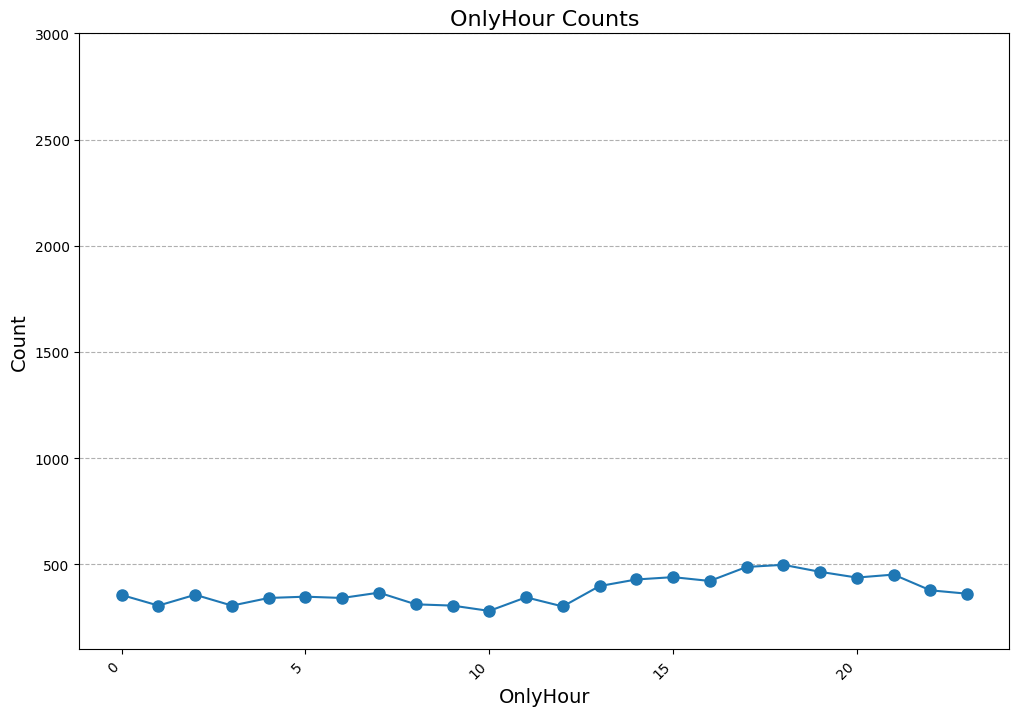

In [ ]:
plot_time_variable('OnlyHour', 100, 3000)

# Handling missing values

In [ ]:
data.isna().sum()

tweet_id                   0
tweet_created              0
tweet_extracted            0
text                       0
lang                       0
user_id                    0
user_description        1505
user_created               3
user_followers_count       3
user_following_count       3
user_tweet_count           3
user_verified              3
retweet_count              3
like_count                 3
reply_count                3
impression_count           3
OnlyDate                   0
OnlyHour                   0
OnlyMin                    0
dtype: int64

In [ ]:
data.isna().sum()

tweet_id                   0
tweet_created              0
tweet_extracted            0
text                       0
lang                       0
user_id                    0
user_description        1505
user_created               3
user_followers_count       3
user_following_count       3
user_tweet_count           3
user_verified              3
retweet_count              3
like_count                 3
reply_count                3
impression_count           3
OnlyDate                   0
OnlyHour                   0
OnlyMin                    0
dtype: int64

In [ ]:
data

,tweet_id,tweet_created,tweet_extracted,text,lang,user_id,user_description,user_created,user_followers_count,user_following_count,user_tweet_count,user_verified,retweet_count,like_count,reply_count,impression_count,OnlyDate,OnlyHour,OnlyMin
0,1640000000000000000,2023-04-03 03:59:28+00:00,0.004774,RT @DarrellLerner: ChatGPT Plugins are the fas...,en,2383245894,ðŸ’ðŸ’à¥¤à¥¤à¤œà¤¯ à¤¶à¥à¤°à¥€ à¤®à¤¹à¤¾à¤•...,2014-03-11 06:04:10+00:00,269.0,4141.0,3816.0,0.0,628.0,0.0,0.0,0.0,2023-04-03,3,59
1,1640000000000000000,2023-04-03 15:59:59+00:00,0.004916,Get an intelligent chatbot for your website in...,en,1633040000000000000,Passionate about AI and its potential to trans...,2023-03-07 09:43:36+00:00,264.0,24.0,198.0,0.0,0.0,0.0,0.0,58.0,2023-04-03,15,59
2,1640000000000000000,2023-04-03 01:59:25+00:00,0.004752,"ðŸ”¥Hey Guys, #ZenithSwap has launched at just...",en,1311400000000000000,Freedom is the Recognition of Necessity â€¢ Ma...,2020-09-30 20:32:00+00:00,447.0,419.0,12949.0,0.0,0.0,0.0,0.0,0.0,2023-04-03,1,59
3,1640000000000000000,2023-04-03 11:59:28+00:00,0.004866,RT @sinsonetwork: Now! Join #SINSO DataLand^Ch...,en,462142717,Public fakerðŸ‚,2012-01-12 16:25:12+00:00,2286.0,982.0,20438.0,0.0,270.0,0.0,0.0,0.0,2023-04-03,11,59
4,1640000000000000000,2023-04-03 12:59:26+00:00,0.004877,The plagiarism detector will introduce its #AI...,en,896094000000000000,Tech reporter @insidehighered. Mathematician. ...,2017-08-11 19:41:50+00:00,4444.0,1924.0,3320.0,1.0,7.0,22.0,1.0,5769.0,2023-04-03,12,59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9035,1648820000000000000,2023-04-19 22:59:50+00:00,0.031465,RT @brain_slum: âš¡ï¸Brainslum 3333 GIFs Laun...,en,1626820000000000000,NaN,2023-02-18 05:52:43+00:00,0.0,745.0,574.0,0.0,414.0,0.0,0.0,0.0,2023-04-19,22,59
9036,1648570000000000000,2023-04-19 05:59:22+00:00,0.031226,RT @SamanthaPostman: Topics you must master ou...,en,271304698,Les vÃ©ritÃ©s qu'on aime le moins Ã apprendre...,2011-03-24 07:26:56+00:00,84.0,1039.0,2117.0,0.0,163.0,0.0,0.0,0.0,2023-04-19,5,59
9037,1648720000000000000,2023-04-19 15:59:58+00:00,0.031362,RT @openbusinesshq: Watch this amazing video o...,en,134949799,Vice Chairman @ztudium @openbusinesshq @fashio...,2010-04-19 22:58:02+00:00,11717.0,3139.0,4964.0,0.0,15.0,0.0,0.0,0.0,2023-04-19,15,59
9038,1648820000000000000,2023-04-19 22:59:40+00:00,0.031465,RT @Visiitapp: ðŸŽ SIIT Token Giveaway\nðŸ¥³ ...,en,1254491035,NaN,2013-03-09 14:17:02+00:00,49.0,326.0,276.0,0.0,13734.0,0.0,0.0,0.0,2023-04-19,22,59


In [ ]:
data

,tweet_id,tweet_created,tweet_extracted,text,lang,user_id,user_description,user_created,user_followers_count,user_following_count,user_tweet_count,user_verified,retweet_count,like_count,reply_count,impression_count,OnlyDate,OnlyHour,OnlyMin
0,1640000000000000000,2023-04-03 03:59:28+00:00,0.004774,RT @DarrellLerner: ChatGPT Plugins are the fas...,en,2383245894,ðŸ’ðŸ’à¥¤à¥¤à¤œà¤¯ à¤¶à¥à¤°à¥€ à¤®à¤¹à¤¾à¤•...,2014-03-11 06:04:10+00:00,269.0,4141.0,3816.0,0.0,628.0,0.0,0.0,0.0,2023-04-03,3,59
1,1640000000000000000,2023-04-03 15:59:59+00:00,0.004916,Get an intelligent chatbot for your website in...,en,1633040000000000000,Passionate about AI and its potential to trans...,2023-03-07 09:43:36+00:00,264.0,24.0,198.0,0.0,0.0,0.0,0.0,58.0,2023-04-03,15,59
2,1640000000000000000,2023-04-03 01:59:25+00:00,0.004752,"ðŸ”¥Hey Guys, #ZenithSwap has launched at just...",en,1311400000000000000,Freedom is the Recognition of Necessity â€¢ Ma...,2020-09-30 20:32:00+00:00,447.0,419.0,12949.0,0.0,0.0,0.0,0.0,0.0,2023-04-03,1,59
3,1640000000000000000,2023-04-03 11:59:28+00:00,0.004866,RT @sinsonetwork: Now! Join #SINSO DataLand^Ch...,en,462142717,Public fakerðŸ‚,2012-01-12 16:25:12+00:00,2286.0,982.0,20438.0,0.0,270.0,0.0,0.0,0.0,2023-04-03,11,59
4,1640000000000000000,2023-04-03 12:59:26+00:00,0.004877,The plagiarism detector will introduce its #AI...,en,896094000000000000,Tech reporter @insidehighered. Mathematician. ...,2017-08-11 19:41:50+00:00,4444.0,1924.0,3320.0,1.0,7.0,22.0,1.0,5769.0,2023-04-03,12,59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9035,1648820000000000000,2023-04-19 22:59:50+00:00,0.031465,RT @brain_slum: âš¡ï¸Brainslum 3333 GIFs Laun...,en,1626820000000000000,NaN,2023-02-18 05:52:43+00:00,0.0,745.0,574.0,0.0,414.0,0.0,0.0,0.0,2023-04-19,22,59
9036,1648570000000000000,2023-04-19 05:59:22+00:00,0.031226,RT @SamanthaPostman: Topics you must master ou...,en,271304698,Les vÃ©ritÃ©s qu'on aime le moins Ã apprendre...,2011-03-24 07:26:56+00:00,84.0,1039.0,2117.0,0.0,163.0,0.0,0.0,0.0,2023-04-19,5,59
9037,1648720000000000000,2023-04-19 15:59:58+00:00,0.031362,RT @openbusinesshq: Watch this amazing video o...,en,134949799,Vice Chairman @ztudium @openbusinesshq @fashio...,2010-04-19 22:58:02+00:00,11717.0,3139.0,4964.0,0.0,15.0,0.0,0.0,0.0,2023-04-19,15,59
9038,1648820000000000000,2023-04-19 22:59:40+00:00,0.031465,RT @Visiitapp: ðŸŽ SIIT Token Giveaway\nðŸ¥³ ...,en,1254491035,NaN,2013-03-09 14:17:02+00:00,49.0,326.0,276.0,0.0,13734.0,0.0,0.0,0.0,2023-04-19,22,59


In [ ]:
data.to_csv('output.csv',index='False')

In [ ]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer, WordNetLemmatizer

In [ ]:
import string

In [ ]:
import nltk

nltk.download('punkt')
nltk.download('wordnet')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
stemmer = SnowballStemmer('english')
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) # remove @mentions
    text = re.sub(r'#\w+', '', text) # remove hashtags
    text = re.sub(r'RT[\s]+', '', text) # remove retweets
    text = re.sub(r'https?:\/\/S+', '', text) # remove hyperlinks
    text = re.sub(r'[^\x00-\x7F]+', '', text) # remove non-ASCII characters
    text = text.translate(str.maketrans(string.punctuation, ' ' * len(string.punctuation))) # remove punctutions
    tokens = word_tokenize(text)
    stemmed_tokens = [stemmer.stem(token) for token in tokens] # stemming
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in stemmed_tokens] # lemmatization
    clean_text = ' '.join(lemmatized_tokens)
    return clean_text

data['clean_text'] = data['text'].apply(clean_text)
data['clean_text'] = data['clean_text'].str.lower() # lowercase
     

In [ ]:
data

,tweet_id,tweet_created,tweet_extracted,text,lang,user_id,user_description,user_created,user_followers_count,user_following_count,user_tweet_count,user_verified,retweet_count,like_count,reply_count,impression_count,OnlyDate,OnlyHour,OnlyMin,clean_text
0,1640000000000000000,2023-04-03 03:59:28+00:00,0.004774,RT @DarrellLerner: ChatGPT Plugins are the fas...,en,2383245894,ðŸ’ðŸ’à¥¤à¥¤à¤œà¤¯ à¤¶à¥à¤°à¥€ à¤®à¤¹à¤¾à¤•...,2014-03-11 06:04:10+00:00,269.0,4141.0,3816.0,0.0,628.0,0.0,0.0,0.0,2023-04-03,3,59,chatgpt plugin are the fastest way to get rich...
1,1640000000000000000,2023-04-03 15:59:59+00:00,0.004916,Get an intelligent chatbot for your website in...,en,1633040000000000000,Passionate about AI and its potential to trans...,2023-03-07 09:43:36+00:00,264.0,24.0,198.0,0.0,0.0,0.0,0.0,58.0,2023-04-03,15,59,get an intellig chatbot for your websit in min...
2,1640000000000000000,2023-04-03 01:59:25+00:00,0.004752,"ðŸ”¥Hey Guys, #ZenithSwap has launched at just...",en,1311400000000000000,Freedom is the Recognition of Necessity â€¢ Ma...,2020-09-30 20:32:00+00:00,447.0,419.0,12949.0,0.0,0.0,0.0,0.0,0.0,2023-04-03,1,59,hey guy ha launch at just 55 000 usd marketcap...
3,1640000000000000000,2023-04-03 11:59:28+00:00,0.004866,RT @sinsonetwork: Now! Join #SINSO DataLand^Ch...,en,462142717,Public fakerðŸ‚,2012-01-12 16:25:12+00:00,2286.0,982.0,20438.0,0.0,270.0,0.0,0.0,0.0,2023-04-03,11,59,now join dataland chatgpt 3 23 4 6 task log in...
4,1640000000000000000,2023-04-03 12:59:26+00:00,0.004877,The plagiarism detector will introduce its #AI...,en,896094000000000000,Tech reporter @insidehighered. Mathematician. ...,2017-08-11 19:41:50+00:00,4444.0,1924.0,3320.0,1.0,7.0,22.0,1.0,5769.0,2023-04-03,12,59,the plagiar detector will introduc it detect t...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9035,1648820000000000000,2023-04-19 22:59:50+00:00,0.031465,RT @brain_slum: âš¡ï¸Brainslum 3333 GIFs Laun...,en,1626820000000000000,NaN,2023-02-18 05:52:43+00:00,0.0,745.0,574.0,0.0,414.0,0.0,0.0,0.0,2023-04-19,22,59,slum brainslum 3333 gif launch april 29th virt...
9036,1648570000000000000,2023-04-19 05:59:22+00:00,0.031226,RT @SamanthaPostman: Topics you must master ou...,en,271304698,Les vÃ©ritÃ©s qu'on aime le moins Ã apprendre...,2011-03-24 07:26:56+00:00,84.0,1039.0,2117.0,0.0,163.0,0.0,0.0,0.0,2023-04-19,5,59,topic you must master outsid of busi that will...
9037,1648720000000000000,2023-04-19 15:59:58+00:00,0.031362,RT @openbusinesshq: Watch this amazing video o...,en,134949799,Vice Chairman @ztudium @openbusinesshq @fashio...,2010-04-19 22:58:02+00:00,11717.0,3139.0,4964.0,0.0,15.0,0.0,0.0,0.0,2023-04-19,15,59,watch this amaz video on the vast potenti of g...
9038,1648820000000000000,2023-04-19 22:59:40+00:00,0.031465,RT @Visiitapp: ðŸŽ SIIT Token Giveaway\nðŸ¥³ ...,en,1254491035,NaN,2013-03-09 14:17:02+00:00,49.0,326.0,276.0,0.0,13734.0,0.0,0.0,0.0,2023-04-19,22,59,siit token giveaway we re excit to announc the...


# 3. Data Preprocessing for Sentiment Analysis and Model

In [ ]:
# Function to perform sentiment analysis on a piece of text using the TextBlob library in Python.
# get_sentiment_polarity() function uses the TextBlob library to analyze the sentiment polarity of a given text.
from textblob import TextBlob
import numpy as np

def get_sentiment_polarity(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

data['sentiment_polarity'] = data['clean_text'].apply(get_sentiment_polarity)
data['sentiment'] = np.where(data['sentiment_polarity'] > 0, 'positive',
                             np.where(data['sentiment_polarity'] < 0, 'negative', 'neutral'))

In [ ]:
data

,tweet_id,tweet_created,tweet_extracted,text,lang,user_id,user_description,user_created,user_followers_count,user_following_count,user_tweet_count,user_verified,retweet_count,like_count,reply_count,impression_count,OnlyDate,OnlyHour,OnlyMin,clean_text,sentiment_polarity,sentiment
0,1640000000000000000,2023-04-03 03:59:28+00:00,0.004774,RT @DarrellLerner: ChatGPT Plugins are the fas...,en,2383245894,ðŸ’ðŸ’à¥¤à¥¤à¤œà¤¯ à¤¶à¥à¤°à¥€ à¤®à¤¹à¤¾à¤•...,2014-03-11 06:04:10+00:00,269.0,4141.0,3816.0,0.0,628.0,0.0,0.0,0.0,2023-04-03,3,59,chatgpt plugin are the fastest way to get rich...,0.375,positive
1,1640000000000000000,2023-04-03 15:59:59+00:00,0.004916,Get an intelligent chatbot for your website in...,en,1633040000000000000,Passionate about AI and its potential to trans...,2023-03-07 09:43:36+00:00,264.0,24.0,198.0,0.0,0.0,0.0,0.0,58.0,2023-04-03,15,59,get an intellig chatbot for your websit in min...,0.000,neutral
2,1640000000000000000,2023-04-03 01:59:25+00:00,0.004752,"ðŸ”¥Hey Guys, #ZenithSwap has launched at just...",en,1311400000000000000,Freedom is the Recognition of Necessity â€¢ Ma...,2020-09-30 20:32:00+00:00,447.0,419.0,12949.0,0.0,0.0,0.0,0.0,0.0,2023-04-03,1,59,hey guy ha launch at just 55 000 usd marketcap...,0.000,neutral
3,1640000000000000000,2023-04-03 11:59:28+00:00,0.004866,RT @sinsonetwork: Now! Join #SINSO DataLand^Ch...,en,462142717,Public fakerðŸ‚,2012-01-12 16:25:12+00:00,2286.0,982.0,20438.0,0.0,270.0,0.0,0.0,0.0,2023-04-03,11,59,now join dataland chatgpt 3 23 4 6 task log in...,0.000,neutral
4,1640000000000000000,2023-04-03 12:59:26+00:00,0.004877,The plagiarism detector will introduce its #AI...,en,896094000000000000,Tech reporter @insidehighered. Mathematician. ...,2017-08-11 19:41:50+00:00,4444.0,1924.0,3320.0,1.0,7.0,22.0,1.0,5769.0,2023-04-03,12,59,the plagiar detector will introduc it detect t...,0.000,neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9035,1648820000000000000,2023-04-19 22:59:50+00:00,0.031465,RT @brain_slum: âš¡ï¸Brainslum 3333 GIFs Laun...,en,1626820000000000000,NaN,2023-02-18 05:52:43+00:00,0.0,745.0,574.0,0.0,414.0,0.0,0.0,0.0,2023-04-19,22,59,slum brainslum 3333 gif launch april 29th virt...,0.400,positive
9036,1648570000000000000,2023-04-19 05:59:22+00:00,0.031226,RT @SamanthaPostman: Topics you must master ou...,en,271304698,Les vÃ©ritÃ©s qu'on aime le moins Ã apprendre...,2011-03-24 07:26:56+00:00,84.0,1039.0,2117.0,0.0,163.0,0.0,0.0,0.0,2023-04-19,5,59,topic you must master outsid of busi that will...,0.000,neutral
9037,1648720000000000000,2023-04-19 15:59:58+00:00,0.031362,RT @openbusinesshq: Watch this amazing video o...,en,134949799,Vice Chairman @ztudium @openbusinesshq @fashio...,2010-04-19 22:58:02+00:00,11717.0,3139.0,4964.0,0.0,15.0,0.0,0.0,0.0,2023-04-19,15,59,watch this amaz video on the vast potenti of g...,0.000,neutral
9038,1648820000000000000,2023-04-19 22:59:40+00:00,0.031465,RT @Visiitapp: ðŸŽ SIIT Token Giveaway\nðŸ¥³ ...,en,1254491035,NaN,2013-03-09 14:17:02+00:00,49.0,326.0,276.0,0.0,13734.0,0.0,0.0,0.0,2023-04-19,22,59,siit token giveaway we re excit to announc the...,0.000,neutral


In [ ]:
headers = ['clean_text', 'sentiment']
df = pd.DataFrame(data, columns=headers)

In [ ]:
df.to_excel('table_data1.xlsx', index=False)


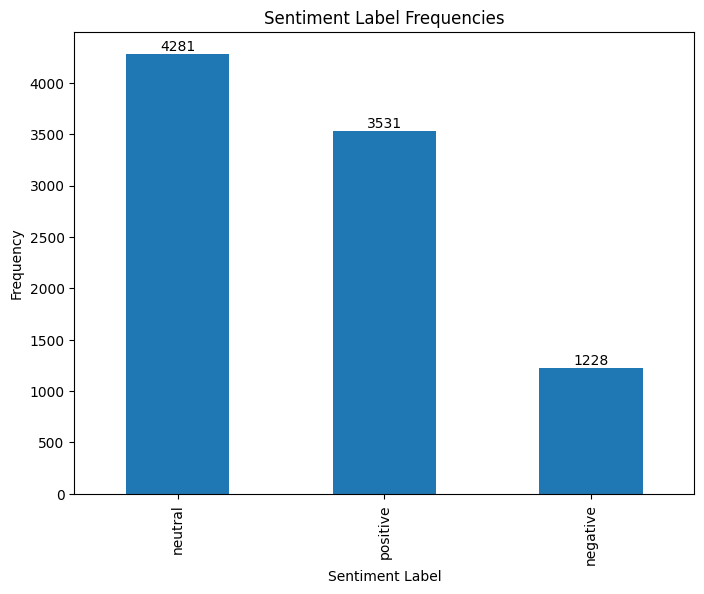

In [ ]:
# count the frequency of each sentiment label
sentiment_counts = data.sentiment.value_counts()

# create a column plot
fig, ax = plt.subplots(figsize=(8,6))
sentiment_counts.plot(kind='bar', ax=ax)

# set the plot title and axis labels
ax.set_title('Sentiment Label Frequencies')
ax.set_xlabel('Sentiment Label')
ax.set_ylabel('Frequency')

# add data labels to the top of each column
for i, freq in enumerate(sentiment_counts):
    ax.text(i, freq, str(freq), ha='center', va='bottom')

# display the plot
plt.show()

In [ ]:
import plotly.offline as pyo
import plotly.graph_objects as go
# Get the value counts for user_verified
value_counts = data['sentiment'].value_counts()

## Create a pie chart using Plotly
labels = value_counts.index
values = value_counts.values

trace = go.Pie(labels=labels, values=values)
layout = go.Layout(title='Sentiment Classification', width=600, height=400)

fig = go.Figure(data=[trace], layout=layout)

# Display the chart
pyo.iplot(fig)

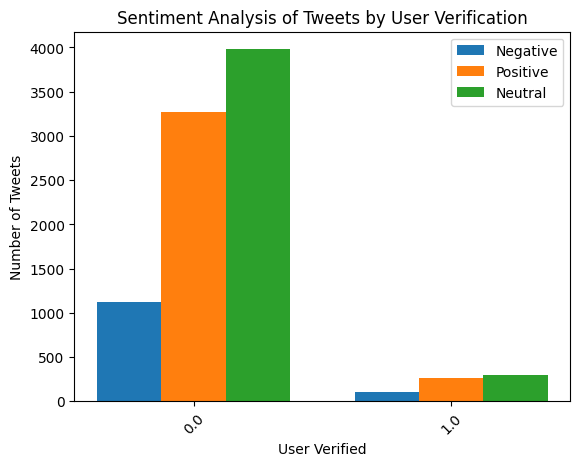

In [ ]:
# Create a new DataFrame with counts of each sentiment per user_verified
count_data = data.groupby(['user_verified', 'sentiment']).size().unstack(fill_value=0)


# Set up the triple bar chart
fig, ax = plt.subplots()

bar_width = 0.25
x_pos = np.arange(len(count_data.index))

ax.bar(x_pos - bar_width, count_data['negative'], width=bar_width, label='Negative')
ax.bar(x_pos, count_data['positive'], width=bar_width, label='Positive')
ax.bar(x_pos + bar_width, count_data['neutral'], width=bar_width, label='Neutral')

# Add labels and legend
ax.set_xlabel('User Verified')
ax.set_ylabel('Number of Tweets')
ax.set_title("Sentiment Analysis of Tweets by User Verification")
ax.set_xticks(x_pos)
ax.set_xticklabels(count_data.index, rotation=45)
ax.legend()

# Show the plot
plt.show()


In [ ]:
data.columns

Index(['tweet_id', 'tweet_created', 'tweet_extracted', 'text', 'lang',
       'user_id', 'user_description', 'user_created', 'user_followers_count',
       'user_following_count', 'user_tweet_count', 'user_verified',
       'retweet_count', 'like_count', 'reply_count', 'impression_count',
       'OnlyDate', 'OnlyHour', 'OnlyMin', 'clean_text', 'sentiment_polarity',
       'sentiment'],
      dtype='object')

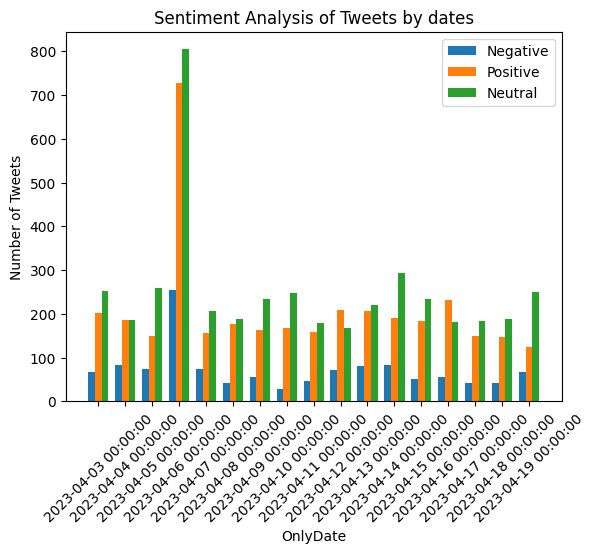

In [ ]:
# Create a new DataFrame with counts of each sentiment per user_verified
count_data = data.groupby(['OnlyDate', 'sentiment']).size().unstack(fill_value=0)


# Set up the triple bar chart
fig, ax = plt.subplots()

bar_width = 0.25
x_pos = np.arange(len(count_data.index))

ax.bar(x_pos - bar_width, count_data['negative'], width=bar_width, label='Negative')
ax.bar(x_pos, count_data['positive'], width=bar_width, label='Positive')
ax.bar(x_pos + bar_width, count_data['neutral'], width=bar_width, label='Neutral')

# Add labels and legend
ax.set_xlabel('OnlyDate')
ax.set_ylabel('Number of Tweets')
ax.set_title("Sentiment Analysis of Tweets by dates")
ax.set_xticks(x_pos)
ax.set_xticklabels(count_data.index, rotation=45)
ax.legend()

# Show the plot
plt.show()


In [ ]:
data.head()

,tweet_id,tweet_created,tweet_extracted,text,lang,user_id,user_description,user_created,user_followers_count,user_following_count,user_tweet_count,user_verified,retweet_count,like_count,reply_count,impression_count,OnlyDate,OnlyHour,OnlyMin,clean_text,sentiment_polarity,sentiment
0,1640000000000000000,2023-04-03 03:59:28+00:00,0.004774,RT @DarrellLerner: ChatGPT Plugins are the fas...,en,2383245894,ðŸ’ðŸ’à¥¤à¥¤à¤œà¤¯ à¤¶à¥à¤°à¥€ à¤®à¤¹à¤¾à¤•...,2014-03-11 06:04:10+00:00,269.0,4141.0,3816.0,0.0,628.0,0.0,0.0,0.0,2023-04-03,3,59,chatgpt plugin are the fastest way to get rich...,0.375,positive
1,1640000000000000000,2023-04-03 15:59:59+00:00,0.004916,Get an intelligent chatbot for your website in...,en,1633040000000000000,Passionate about AI and its potential to trans...,2023-03-07 09:43:36+00:00,264.0,24.0,198.0,0.0,0.0,0.0,0.0,58.0,2023-04-03,15,59,get an intellig chatbot for your websit in min...,0.000,neutral
2,1640000000000000000,2023-04-03 01:59:25+00:00,0.004752,"ðŸ”¥Hey Guys, #ZenithSwap has launched at just...",en,1311400000000000000,Freedom is the Recognition of Necessity â€¢ Ma...,2020-09-30 20:32:00+00:00,447.0,419.0,12949.0,0.0,0.0,0.0,0.0,0.0,2023-04-03,1,59,hey guy ha launch at just 55 000 usd marketcap...,0.000,neutral
3,1640000000000000000,2023-04-03 11:59:28+00:00,0.004866,RT @sinsonetwork: Now! Join #SINSO DataLand^Ch...,en,462142717,Public fakerðŸ‚,2012-01-12 16:25:12+00:00,2286.0,982.0,20438.0,0.0,270.0,0.0,0.0,0.0,2023-04-03,11,59,now join dataland chatgpt 3 23 4 6 task log in...,0.000,neutral
4,1640000000000000000,2023-04-03 12:59:26+00:00,0.004877,The plagiarism detector will introduce its #AI...,en,896094000000000000,Tech reporter @insidehighered. Mathematician. ...,2017-08-11 19:41:50+00:00,4444.0,1924.0,3320.0,1.0,7.0,22.0,1.0,5769.0,2023-04-03,12,59,the plagiar detector will introduc it detect t...,0.000,neutral


In [ ]:
specific_row = data['clean_text'][3]
print(specific_row)

now join dataland chatgpt 3 23 4 6 task log in to lt http t co hlwqa7hg40 gt tri sinso amp twe


In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:

# Define stop words
stop_words = set(stopwords.words('english'))

# Define function to remove stop words
def remove_stopwords(text):
    # Tokenize the text
    tokens = word_tokenize(text)
    # Remove stop words
    filtered_tokens = [token for token in tokens if not token in stop_words]
    # Join the filtered tokens back into a string
    filtered_text = ' '.join(filtered_tokens)
    return filtered_text

# Apply the function to the dataframe column
data['clean_text'] = data['clean_text'].apply(remove_stopwords)

In [ ]:
from nltk.stem import PorterStemmer

In [ ]:

def perform_stemming(text):
    stemmer = PorterStemmer()
    new_list = []
    words = word_tokenize(text)
    for word in words:
        new_list.append(stemmer.stem(word))

    return " ".join(new_list)

data['clean_text'] = data['clean_text'].apply(perform_stemming)

In [ ]:
import re

def remove_links_and_numbers(text):
    # Remove links
    text_without_links = re.sub(r'http\S+|www.\S+', '', text)
    
    # Remove the word 'https'
    text_without_links_and_numbers = re.sub(r'http', '', text_without_links)
    
    # Remove numbers
    text_without_links_and_numbers = re.sub(r'\d+', '', text_without_links_and_numbers)
    
    return text_without_links_and_numbers


# Apply the remove_links_and_numbers() function to the 'cleaned_text' column
data['clean_text'] = data['clean_text'].apply(remove_links_and_numbers)


In [ ]:
data.head()

,tweet_id,tweet_created,tweet_extracted,text,lang,user_id,user_description,user_created,user_followers_count,user_following_count,user_tweet_count,user_verified,retweet_count,like_count,reply_count,impression_count,OnlyDate,OnlyHour,OnlyMin,clean_text,sentiment_polarity,sentiment
0,1640000000000000000,2023-04-03 03:59:28+00:00,0.004774,RT @DarrellLerner: ChatGPT Plugins are the fas...,en,2383245894,ðŸ’ðŸ’à¥¤à¥¤à¤œà¤¯ à¤¶à¥à¤°à¥€ à¤®à¤¹à¤¾à¤•...,2014-03-11 06:04:10+00:00,269.0,4141.0,3816.0,0.0,628.0,0.0,0.0,0.0,2023-04-03,3,59,chatgpt plugin fastest way get rich ive creat...,0.375,positive
1,1640000000000000000,2023-04-03 15:59:59+00:00,0.004916,Get an intelligent chatbot for your website in...,en,1633040000000000000,Passionate about AI and its potential to trans...,2023-03-07 09:43:36+00:00,264.0,24.0,198.0,0.0,0.0,0.0,0.0,58.0,2023-04-03,15,59,get intellig chatbot websit minut chatba ai tr...,0.000,neutral
2,1640000000000000000,2023-04-03 01:59:25+00:00,0.004752,"ðŸ”¥Hey Guys, #ZenithSwap has launched at just...",en,1311400000000000000,Freedom is the Recognition of Necessity â€¢ Ma...,2020-09-30 20:32:00+00:00,447.0,419.0,12949.0,0.0,0.0,0.0,0.0,0.0,2023-04-03,1,59,hey guy ha launch usd marketcap chatgpt dex ...,0.000,neutral
3,1640000000000000000,2023-04-03 11:59:28+00:00,0.004866,RT @sinsonetwork: Now! Join #SINSO DataLand^Ch...,en,462142717,Public fakerðŸ‚,2012-01-12 16:25:12+00:00,2286.0,982.0,20438.0,0.0,270.0,0.0,0.0,0.0,2023-04-03,11,59,join dataland chatgpt task log lt co hlwq...,0.000,neutral
4,1640000000000000000,2023-04-03 12:59:26+00:00,0.004877,The plagiarism detector will introduce its #AI...,en,896094000000000000,Tech reporter @insidehighered. Mathematician. ...,2017-08-11 19:41:50+00:00,4444.0,1924.0,3320.0,1.0,7.0,22.0,1.0,5769.0,2023-04-03,12,59,plagiar detector introduc detect tool tomorrow...,0.000,neutral


In [ ]:
'''import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')'''

"import nltk\nnltk.download('stopwords')\nnltk.download('punkt')\nnltk.download('wordnet')"

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Wordcloud for positive tweets about chatgpt

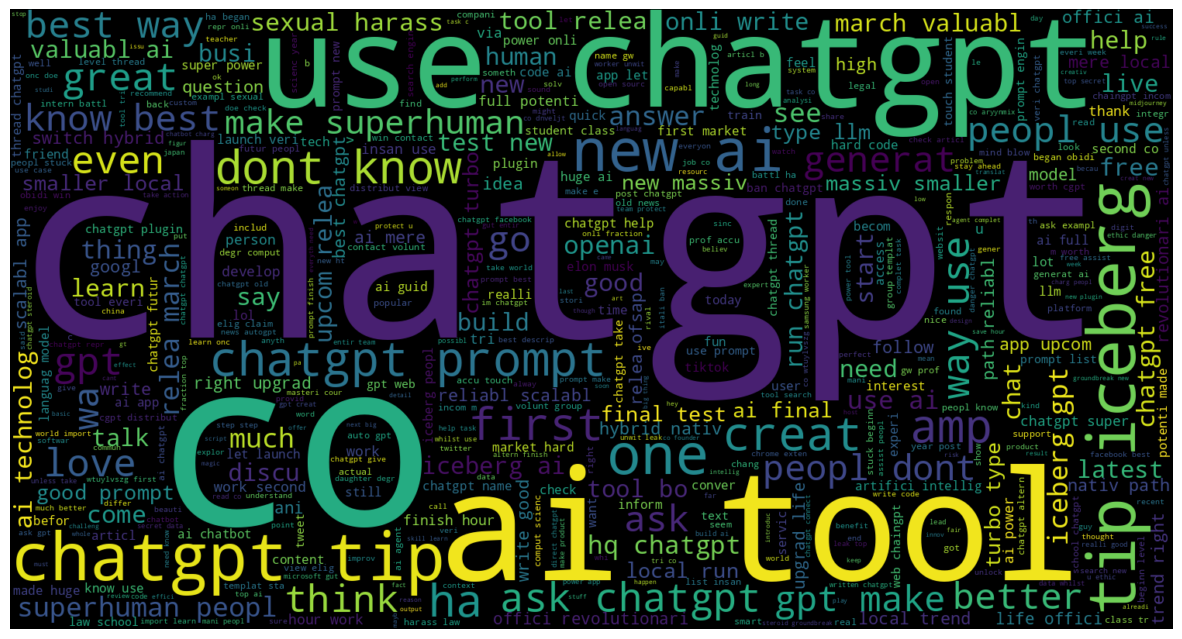

In [ ]:
text = " ".join(data[data['sentiment'] == 'positive']['clean_text'])
plt.figure(figsize = (15, 10))
wordcloud = WordCloud(max_words=500, height= 800, width = 1500,  background_color="black", colormap= 'viridis').generate(text)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

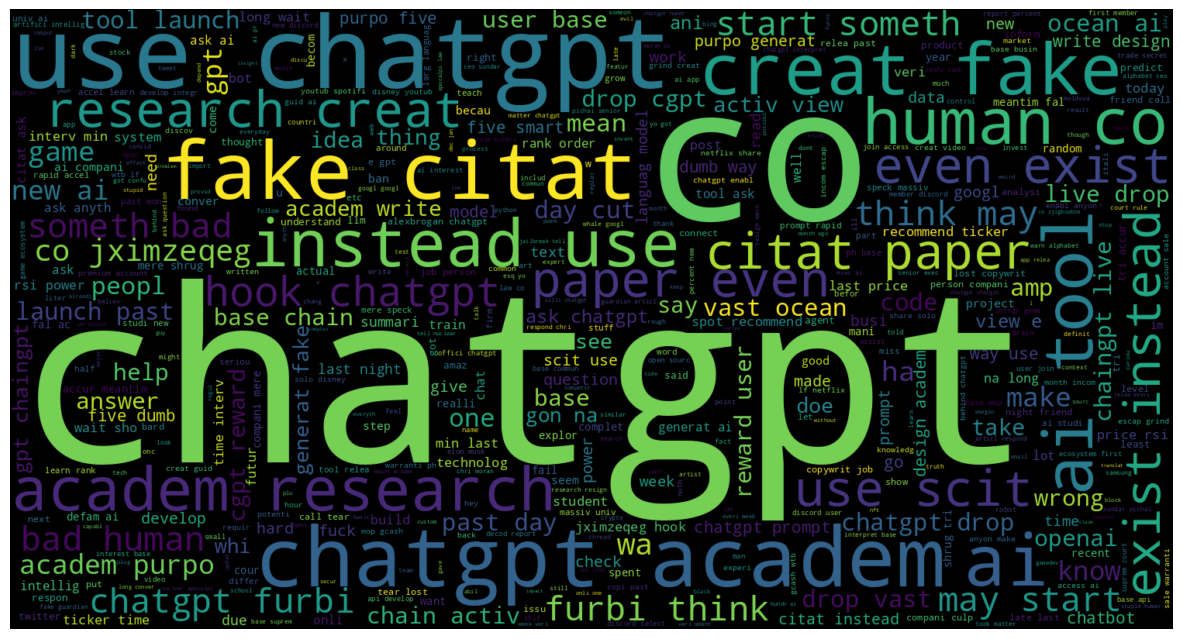

In [ ]:
text = " ".join(data[data['sentiment'] == 'negative']['clean_text'])
plt.figure(figsize = (15, 10))
wordcloud = WordCloud(max_words=500, height= 800, width = 1500,  background_color="black", colormap= 'viridis').generate(text)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

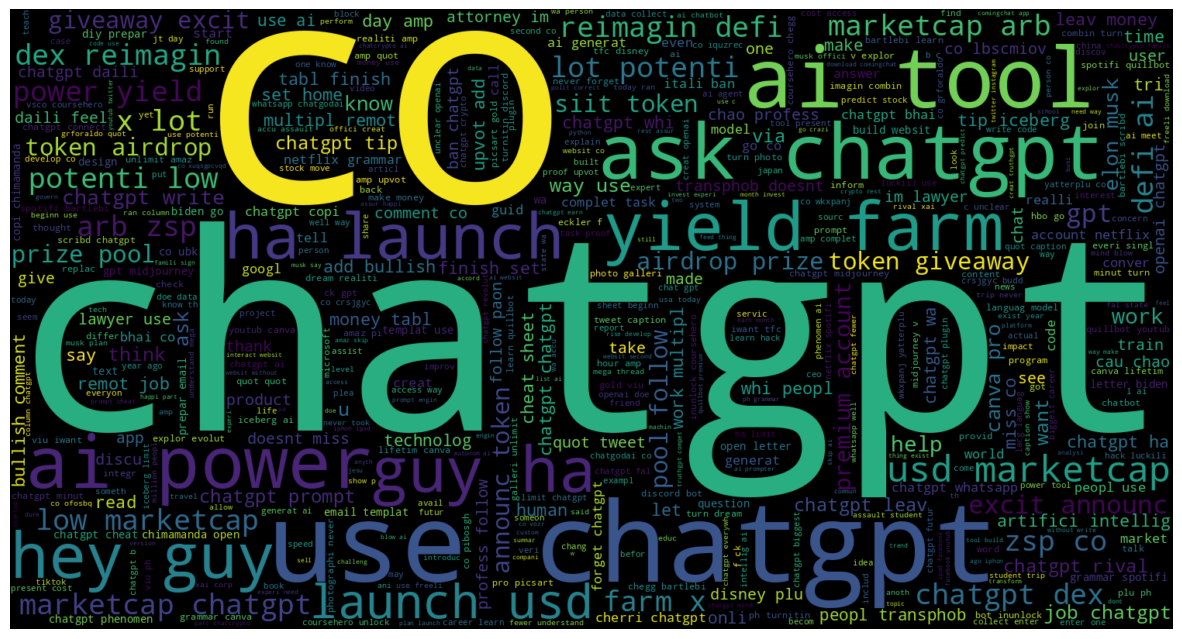

In [ ]:
text = " ".join(data[data['sentiment'] == 'neutral']['clean_text'])
plt.figure(figsize = (15, 10))
wordcloud = WordCloud(max_words=500, height= 800, width = 1500,  background_color="black", colormap= 'viridis').generate(text)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [ ]:
from collections import Counter

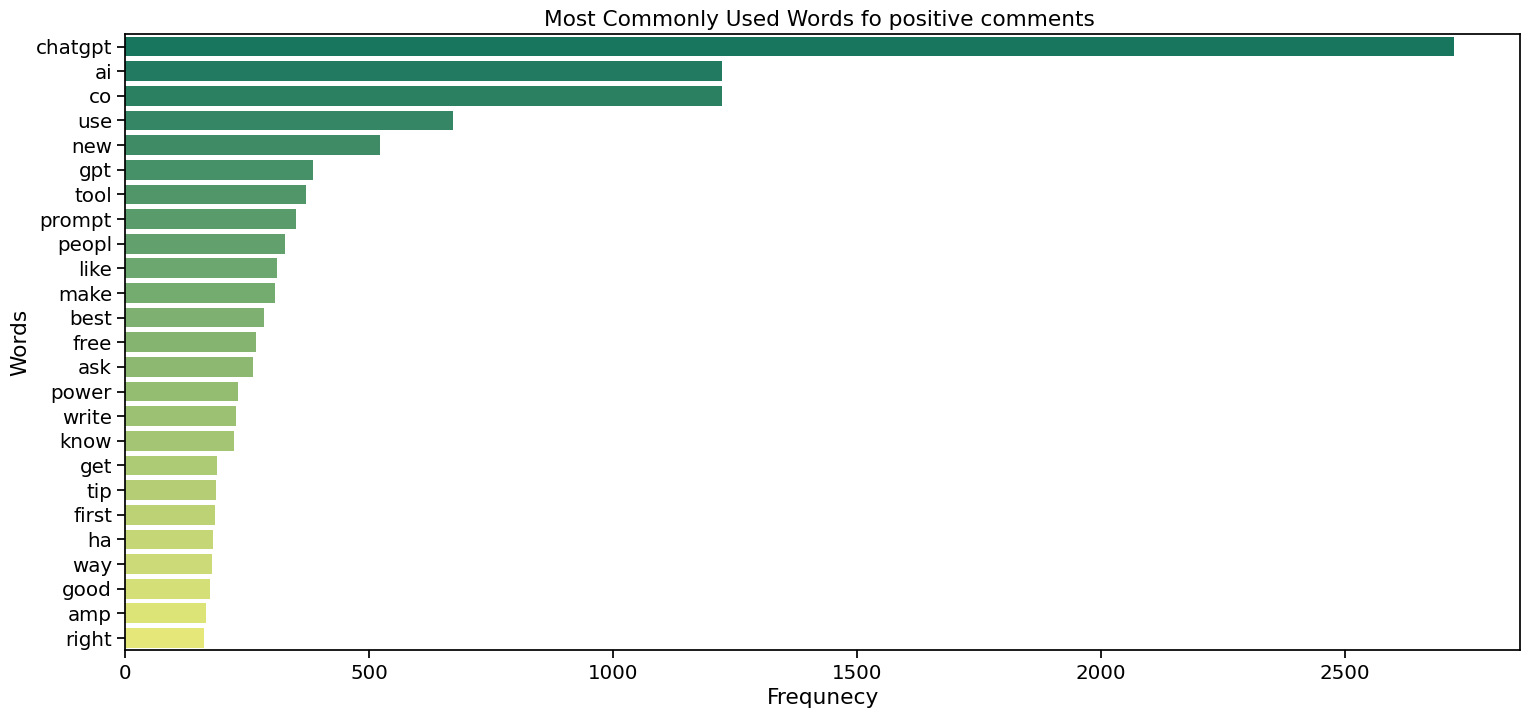

In [ ]:
all_nodep_words = []
for sentence in data[data['sentiment'] == 'positive']['clean_text'].to_list():
    for word in sentence.split():
        all_nodep_words.append(word)

df = pd.DataFrame(Counter(all_nodep_words).most_common(25), columns= ['Word', 'Frequency'])

sns.set_context('notebook', font_scale= 1.3)
plt.figure(figsize=(18,8))
sns.barplot(y = df['Word'], x= df['Frequency'], palette= 'summer')
plt.title("Most Commonly Used Words fo positive comments ")
plt.xlabel("Frequnecy")
plt.ylabel("Words")
plt.show()

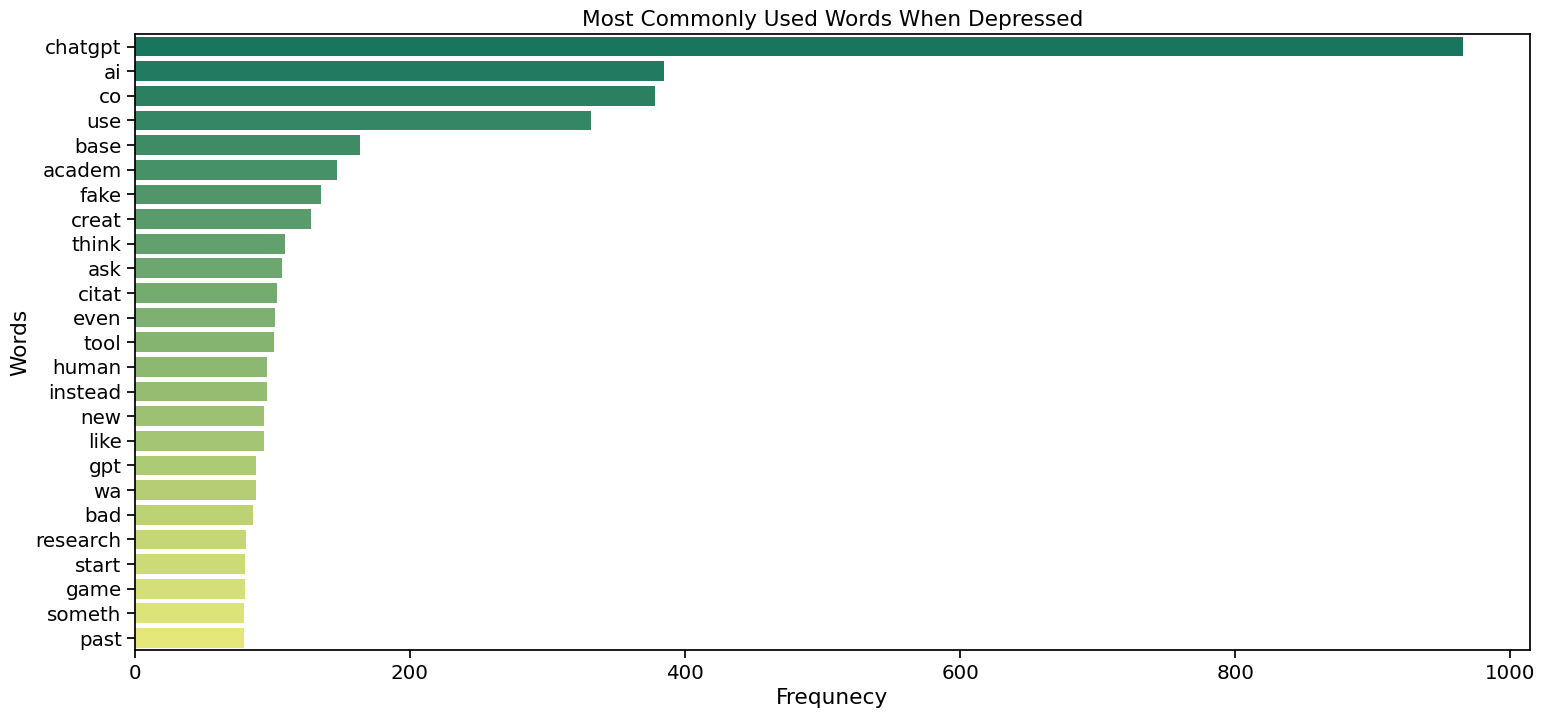

In [ ]:
#code by "Spam Classifier | NLP | 98% Accuracy " by ANUBHAV GOYAL (https://www.kaggle.com/code/anubhavgoyal10/spam-classifier-nlp-98-accuracy)

all_dep_words = []
for sentence in data[data['sentiment'] == 'negative']['clean_text'].to_list():
    for word in sentence.split():
        all_dep_words.append(word)

df = pd.DataFrame(Counter(all_dep_words).most_common(25), columns= ['Word', 'Frequency'])

sns.set_context('notebook', font_scale= 1.3)
plt.figure(figsize=(18,8))
sns.barplot(y = df['Word'], x= df['Frequency'], palette= 'summer')
plt.title("Most Commonly Used Words When Depressed")
plt.xlabel("Frequnecy")
plt.ylabel("Words")
plt.show()

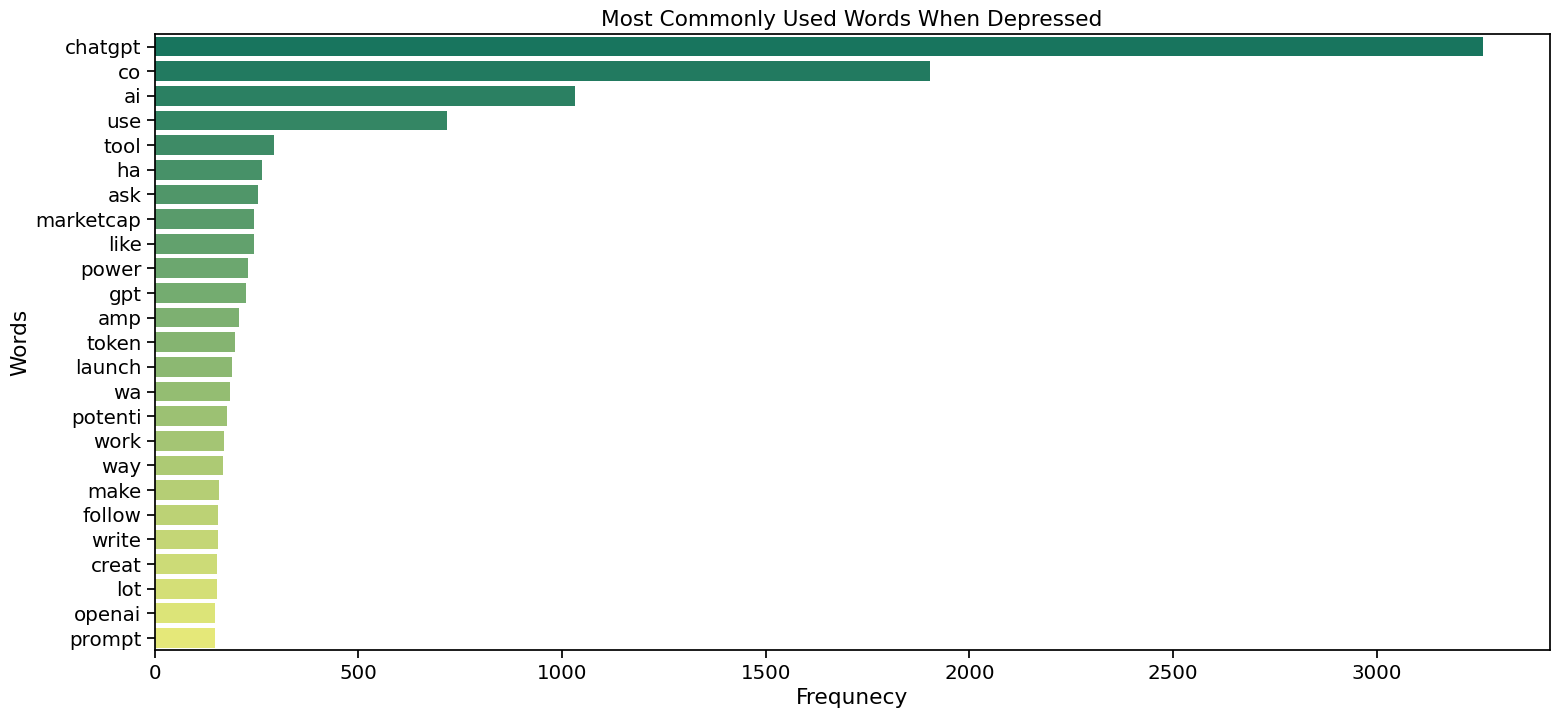

In [ ]:
#code by "Spam Classifier | NLP | 98% Accuracy " by ANUBHAV GOYAL (https://www.kaggle.com/code/anubhavgoyal10/spam-classifier-nlp-98-accuracy)

all_dep_words = []
for sentence in data[data['sentiment'] == 'neutral']['clean_text'].to_list():
    for word in sentence.split():
        all_dep_words.append(word)

df = pd.DataFrame(Counter(all_dep_words).most_common(25), columns= ['Word', 'Frequency'])

sns.set_context('notebook', font_scale= 1.3)
plt.figure(figsize=(18,8))
sns.barplot(y = df['Word'], x= df['Frequency'], palette= 'summer')
plt.title("Most Commonly Used Words When Depressed")
plt.xlabel("Frequnecy")
plt.ylabel("Words")
plt.show()

In [ ]:
data.dtypes


tweet_id                              int64
tweet_created           datetime64[ns, UTC]
tweet_extracted                     float64
text                                 object
lang                                 object
user_id                               int64
user_description                     object
user_created                         object
user_followers_count                float64
user_following_count                float64
user_tweet_count                    float64
user_verified                       float64
retweet_count                       float64
like_count                          float64
reply_count                         float64
impression_count                    float64
OnlyDate                     datetime64[ns]
OnlyHour                              int64
OnlyMin                               int64
clean_text                           object
sentiment_polarity                  float64
sentiment                            object
dtype: object

In [ ]:
data

,tweet_id,tweet_created,tweet_extracted,text,lang,user_id,user_description,user_created,user_followers_count,user_following_count,user_tweet_count,user_verified,retweet_count,like_count,reply_count,impression_count,OnlyDate,OnlyHour,OnlyMin,clean_text,sentiment_polarity,sentiment
0,1640000000000000000,2023-04-03 03:59:28+00:00,0.004774,RT @DarrellLerner: ChatGPT Plugins are the fas...,en,2383245894,ðŸ’ðŸ’à¥¤à¥¤à¤œà¤¯ à¤¶à¥à¤°à¥€ à¤®à¤¹à¤¾à¤•...,2014-03-11 06:04:10+00:00,269.0,4141.0,3816.0,0.0,628.0,0.0,0.0,0.0,2023-04-03,3,59,chatgpt plugin fastest way get rich ive creat...,0.375,positive
1,1640000000000000000,2023-04-03 15:59:59+00:00,0.004916,Get an intelligent chatbot for your website in...,en,1633040000000000000,Passionate about AI and its potential to trans...,2023-03-07 09:43:36+00:00,264.0,24.0,198.0,0.0,0.0,0.0,0.0,58.0,2023-04-03,15,59,get intellig chatbot websit minut chatba ai tr...,0.000,neutral
2,1640000000000000000,2023-04-03 01:59:25+00:00,0.004752,"ðŸ”¥Hey Guys, #ZenithSwap has launched at just...",en,1311400000000000000,Freedom is the Recognition of Necessity â€¢ Ma...,2020-09-30 20:32:00+00:00,447.0,419.0,12949.0,0.0,0.0,0.0,0.0,0.0,2023-04-03,1,59,hey guy ha launch usd marketcap chatgpt dex ...,0.000,neutral
3,1640000000000000000,2023-04-03 11:59:28+00:00,0.004866,RT @sinsonetwork: Now! Join #SINSO DataLand^Ch...,en,462142717,Public fakerðŸ‚,2012-01-12 16:25:12+00:00,2286.0,982.0,20438.0,0.0,270.0,0.0,0.0,0.0,2023-04-03,11,59,join dataland chatgpt task log lt co hlwq...,0.000,neutral
4,1640000000000000000,2023-04-03 12:59:26+00:00,0.004877,The plagiarism detector will introduce its #AI...,en,896094000000000000,Tech reporter @insidehighered. Mathematician. ...,2017-08-11 19:41:50+00:00,4444.0,1924.0,3320.0,1.0,7.0,22.0,1.0,5769.0,2023-04-03,12,59,plagiar detector introduc detect tool tomorrow...,0.000,neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9035,1648820000000000000,2023-04-19 22:59:50+00:00,0.031465,RT @brain_slum: âš¡ï¸Brainslum 3333 GIFs Laun...,en,1626820000000000000,NaN,2023-02-18 05:52:43+00:00,0.0,745.0,574.0,0.0,414.0,0.0,0.0,0.0,2023-04-19,22,59,slum brainslum gif launch april th virtual in...,0.400,positive
9036,1648570000000000000,2023-04-19 05:59:22+00:00,0.031226,RT @SamanthaPostman: Topics you must master ou...,en,271304698,Les vÃ©ritÃ©s qu'on aime le moins Ã apprendre...,2011-03-24 07:26:56+00:00,84.0,1039.0,2117.0,0.0,163.0,0.0,0.0,0.0,2023-04-19,5,59,topic must master outsid busi make money sale ...,0.000,neutral
9037,1648720000000000000,2023-04-19 15:59:58+00:00,0.031362,RT @openbusinesshq: Watch this amazing video o...,en,134949799,Vice Chairman @ztudium @openbusinesshq @fashio...,2010-04-19 22:58:02+00:00,11717.0,3139.0,4964.0,0.0,15.0,0.0,0.0,0.0,2023-04-19,15,59,watch amaz video vast potenti generat ai featur,0.000,neutral
9038,1648820000000000000,2023-04-19 22:59:40+00:00,0.031465,RT @Visiitapp: ðŸŽ SIIT Token Giveaway\nðŸ¥³ ...,en,1254491035,NaN,2013-03-09 14:17:02+00:00,49.0,326.0,276.0,0.0,13734.0,0.0,0.0,0.0,2023-04-19,22,59,siit token giveaway excit announc token airdr...,0.000,neutral


In [ ]:
data.drop(["tweet_id", "tweet_created", "tweet_extracted", "lang","text","user_id", "user_description",
           "user_created", "user_followers_count", "user_following_count", "user_tweet_count",
           "user_verified", "sentiment_polarity",  "text",'retweet_count','reply_count','OnlyDate','OnlyHour','OnlyMin','like_count','impression_count'], axis=1, inplace=True)

In [ ]:
data

,clean_text,sentiment
0,chatgpt plugin fastest way get rich ive creat...,positive
1,get intellig chatbot websit minut chatba ai tr...,neutral
2,hey guy ha launch usd marketcap chatgpt dex ...,neutral
3,join dataland chatgpt task log lt co hlwq...,neutral
4,plagiar detector introduc detect tool tomorrow...,neutral
...,...,...
9035,slum brainslum gif launch april th virtual in...,positive
9036,topic must master outsid busi make money sale ...,neutral
9037,watch amaz video vast potenti generat ai featur,neutral
9038,siit token giveaway excit announc token airdr...,neutral


In [ ]:
data.to_csv("extracted_output.csv", index=False)

# 4. Sentiment Analysis

In [ ]:
data.isna().sum()

clean_text    0
sentiment     0
dtype: int64

# Vectorization

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
# Create a mapping dictionary
sentiment_mapping = {'positive': 1, 'neutral':0,'negative': -1}

# Replace values in the 'sentiment' column using the mapping dictionary
data['sentiment'] = data['sentiment'].replace(sentiment_mapping)

In [ ]:
data.head()

,clean_text,sentiment
0,chatgpt plugin fastest way get rich ive creat...,1
1,get intellig chatbot websit minut chatba ai tr...,0
2,hey guy ha launch usd marketcap chatgpt dex ...,0
3,join dataland chatgpt task log lt co hlwq...,0
4,plagiar detector introduc detect tool tomorrow...,0


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB, ComplementNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


# Split the data into training and testing sets
X = data['clean_text']
y = data['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorize the text data
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Define the models to evaluate
models = [
    ('Gaussian Naive Bayes', GaussianNB()),
    ('Multinomial Naive Bayes', MultinomialNB()),
    ('Bernoulli Naive Bayes', BernoulliNB()),
    ('Complement Naive Bayes', ComplementNB()),
    ('Random Forest', RandomForestClassifier()),
    ('Logistic Regression', LogisticRegression(max_iter=1000))]

# Evaluate each model
for model_name, model in models:
    print(f'----- {model_name} -----')
    # Train the model
    model.fit(X_train_vec.toarray(), y_train)
  
    # Make predictions on the test set
    y_pred = model.predict(X_test_vec.toarray())
  
    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    cm = confusion_matrix(y_test, y_pred)
  
    # Print the evaluation metrics
    print('Confusion Matrix:')
    print(cm)
    print('Accuracy:', accuracy)
    print('Precision:', precision)
    print('Recall:', recall)
    print('\n')

----- Gaussian Naive Bayes -----
Confusion Matrix:
[[176  11  56]
 [202 444 231]
 [147  25 516]]
Accuracy: 0.6283185840707964
Precision: 0.7382687910419682
Recall: 0.6283185840707964


----- Multinomial Naive Bayes -----
Confusion Matrix:
[[138  19  86]
 [ 20 637 220]
 [ 13  33 642]]
Accuracy: 0.7837389380530974
Precision: 0.8146242447707539
Recall: 0.7837389380530974


----- Bernoulli Naive Bayes -----
Confusion Matrix:
[[120  29  94]
 [  3 738 136]
 [  5  50 633]]
Accuracy: 0.8246681415929203
Precision: 0.8432800971317325
Recall: 0.8246681415929203


----- Complement Naive Bayes -----
Confusion Matrix:
[[180  13  50]
 [ 70 606 201]
 [ 18  40 630]]
Accuracy: 0.7831858407079646
Precision: 0.8084417639097576
Recall: 0.7831858407079646


----- Random Forest -----
Confusion Matrix:
[[176  46  21]
 [  2 871   4]
 [  5  73 610]]
Accuracy: 0.9164823008849557
Precision: 0.9215714226451254
Recall: 0.9164823008849557


----- Logistic Regression -----
Confusion Matrix:
[[180  41  22]
 [  7 849  

In [ ]:
# Split the data into features (messages) and labels
X = data['clean_text']
y = data['sentiment']
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
# Convert text data into numerical features using TF-IDF vectorization
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(X)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
#  Train a logistic regression model
model =LogisticRegression()
model.fit(X_train, y_train)

In [ ]:
# Take input from the user
user_input = input("Enter a text message: ")

# Preprocess the user input and convert it into numerical features
user_input_features = vectorizer.transform([user_input])

# Make predictions on the user input
prediction = model.predict(user_input_features)

# Convert the prediction label to a human-readable sentiment
if prediction[0] == 1:
    sentiment = "Positive"
elif prediction[0] == 0:
    sentiment = "Neutral"
else:
    sentiment = "Negative"

# Print the sentiment prediction
print("Sentiment:", sentiment)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Split the data into features (messages) and labels
X = data["clean_text"]
y = data['sentiment'].values




In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42, stratify = y)

In [ ]:
# Convert data to string format
X_train = X_train.astype(str)
X_test = X_test.astype(str)

# Convert text data into numerical features using TF-IDF vectorization
tfidf = TfidfVectorizer(max_features= 22, min_df= 2)
X_train = tfidf.fit_transform(X_train).toarray()
X_test = tfidf.transform(X_test).toarray()

In [ ]:
from sklearn.ensemble import RandomForestClassifier


In [ ]:
# Train a logistic regression model

model = RandomForestClassifier()

# Train the model using the training data
model.fit(X_train, y_train)

In [ ]:
data.head()

# Modeling

In [ ]:
'''pip install catboost'''

In [ ]:
'''from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# Preprocess the text data
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(data['clean_text'])  # Assuming 'text' is the column containing the tweet text
y = data['sentiment']  # Assuming 'sentiment' is the target column

# Split the data into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# Encode the target labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_valid_encoded = label_encoder.transform(y_valid)

# Define the models
models = {
    "Logistic Regression": LogisticRegression(),
    "Naive Bayes": MultinomialNB(),
    "Stochastic Gradient Descent": SGDClassifier(),
    "XGBoost": XGBClassifier(),
    "CatBoost": CatBoostClassifier(),
    "SVC": SVC(),
    "Random Forest": RandomForestClassifier()
}

# Fit and train the models
for name, model in models.items():
    model.fit(X_train, y_train_encoded)
    print(name + " trained")

# Evaluate the models
for name, model in models.items():
    y_pred = model.predict(X_valid)
    accuracy = accuracy_score(y_valid_encoded, y_pred)
    print(name + " Accuracy:", accuracy)


xgboost has high accuracy

In [ ]:
import pickle
vectorizer = TfidfVectorizer()
vectorizer.fit(data)
with open('tfidf_vectorizer.pkl', 'wb') as file:
    pickle.dump(vectorizer, file)

In [ ]:
# Load the classifier from the pickle file
with open("tfidf_vectorizer.pkl", "rb") as f:
    loaded_model = pickle.load(f)

In [ ]:
import pickle
from sklearn.ensemble import RandomForestClassifier

# Train the Random Forest classifier
random_forest_clf = RandomForestClassifier()
random_forest_clf.fit(X_train, y_train)

# Save the classifier to a pickle file
with open("random_forest_classifier.pkl", "wb") as f:
    pickle.dump(random_forest_clf, f)


In [ ]:
'''# Load the classifier from the pickle file
with open("random_forest_classifier.pkl", "rb") as f:
    loaded_model = pickle.load(f)

# Make predictions using the loaded model
predictions = loaded_model.predict(X_test)'''


In [ ]:
data.head()